<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>

# Statistical Learning: HW3

## Deadline: 2023-03-10 ##

* Yu-Ching Liao <ycliao3@illinois.edu>

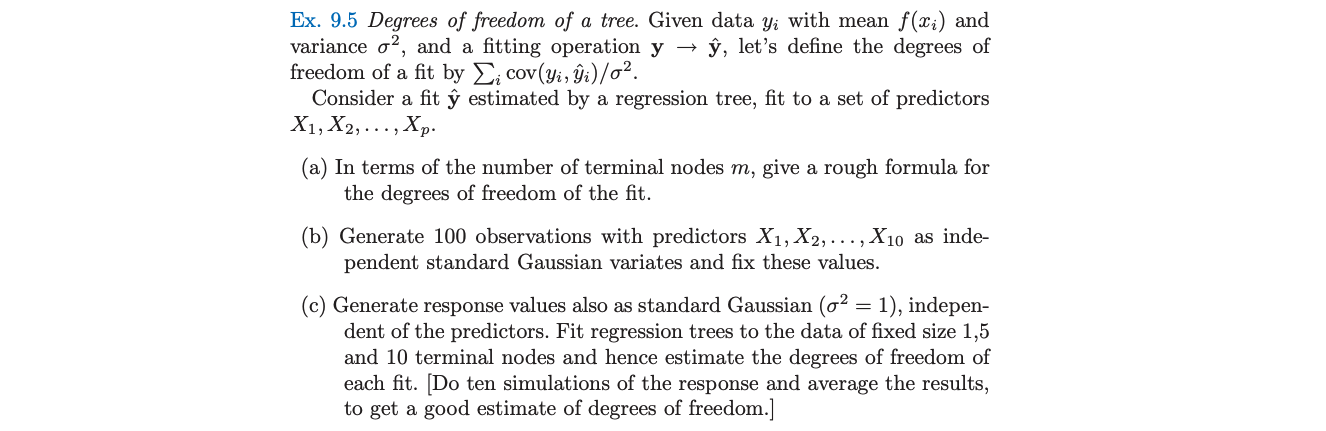

In [276]:
import numpy as np

np.random.seed(123)
X = np.random.randn(100, 10)
Y = np.random.randn(100)
from sklearn.tree import DecisionTreeRegressor

m_values = [2, 5, 10]
dof = []

for i in range(10):
    Y = np.random.randn(100)
    for m in m_values:
        model = DecisionTreeRegressor(max_leaf_nodes=m)
        model.fit(X, Y)
        y_hat = model.predict(X)
        cov = np.cov(Y, y_hat)[0, 1]
        dof.append(cov / np.var(Y))

print("Degrees of freedom for m = 1:", np.mean(dof[:10]))
print("Degrees of freedom for m = 5:", np.mean(dof[10:20]))
print("Degrees of freedom for m = 10:", np.mean(dof[20:]))




Degrees of freedom for m = 1: 0.30300508069354976
Degrees of freedom for m = 5: 0.30399959593279846
Degrees of freedom for m = 10: 0.34189229002081295


In [266]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

p = 10
mean = np.zeros(p)
cov = np.identity(p)

n = 100
X = np.random.multivariate_normal(mean, cov, n)

N = 10
y = np.random.normal(0, 1, size=(n, N))
y_pred = np.copy(y)

numLeaves = 2
for i in range(N):
    y_cur = y[:, i]
    reg = DecisionTreeRegressor(max_leaf_nodes=numLeaves)
    reg.fit(X, y_cur)
    print('Depth: {}, Number of leaves:{}'.format(reg.get_depth(), reg.get_n_leaves()))
    y_pred_cur = reg.predict(X)
    y_pred[:, i] = y_pred_cur

df = 0
print(y.shape)
for i in range(y.shape[0]):
    df += np.cov(y[i, :], y_pred[i, :], ddof=0)[0][1]

print('Estimated degrees of freedom with {} terminal nodes is: {}'.format(numLeaves, df/5))

Depth: 1, Number of leaves:2
Depth: 1, Number of leaves:2
Depth: 1, Number of leaves:2
Depth: 1, Number of leaves:2
Depth: 1, Number of leaves:2
Depth: 1, Number of leaves:2
Depth: 1, Number of leaves:2
Depth: 1, Number of leaves:2
Depth: 1, Number of leaves:2
Depth: 1, Number of leaves:2
(100, 10)
Estimated degrees of freedom with 2 terminal nodes is: 1.7243758579596786


In [268]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd

X = np.random.normal(size = (10, 100))

In [270]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Define function to fit regression tree and estimate degrees of freedom
def fit_and_estimate_df(m):
    df = 0
    for i in range(10):
        y = np.random.normal(size=10)
        if m != 1:
            tree = DecisionTreeRegressor(max_leaf_nodes=m)
            tree.fit(X, y)
            y_hat = tree.predict(X)
            #print(len(y_hat))
        else: 
            y_hat = X.mean(axis=1)
            #print(y_hat)
            
        df += np.cov(y, y_hat)[0, 1]
    return df/(10)

# Fit regression trees with 1, 5, and 10 terminal nodes and estimate degrees of freedom
df_1= fit_and_estimate_df(1)
df_5 = fit_and_estimate_df(5)
df_10 = fit_and_estimate_df(10)

# Print estimated degrees of freedom for each tree size
print("Degrees of freedom for 1 terminal nodes:", df_1)
print("Degrees of freedom for 5 terminal nodes:", df_5)
print("Degrees of freedom for 10 terminal nodes:", df_10)


Degrees of freedom for 1 terminal nodes: -0.016933340224112196
Degrees of freedom for 5 terminal nodes: 0.9419514195236471
Degrees of freedom for 10 terminal nodes: 0.9604727095508256


<100x9 sparse matrix of type '<class 'numpy.int64'>'
	with 353 stored elements in Compressed Sparse Row format>

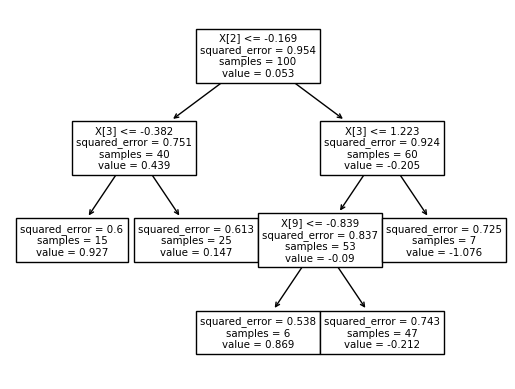

In [170]:
X = np.random.normal(size = (100, 10))
y = np.random.normal(size=100)
tree = DecisionTreeRegressor(max_leaf_nodes=5)
tree.fit(X, y)
_ = plot_tree(tree)